In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Housing.csv") #Importing the dataset
df.head() #checking the first 5 row of it

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [6]:
df.shape #Checking the shape of the dataset

(545, 12)

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.info() #Checking the info about each columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [9]:
df.nunique() #Checking the unique values in each columns of the dataset

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
furnishingstatus      3
dtype: int64

In [10]:
df.isnull().sum() #hecking the null values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [11]:
#separating categorical and int columns in two different variable
df_int = df.select_dtypes(exclude="object")
df_cat = df.select_dtypes(include="object")

In [12]:
df_cat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')

In [13]:
df_cat["mainroad"].unique()

array(['yes', 'no'], dtype=object)

# Univariate Analysis

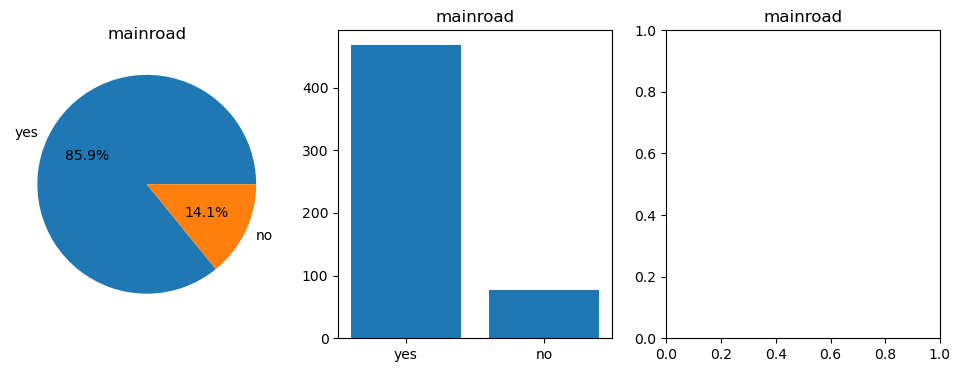

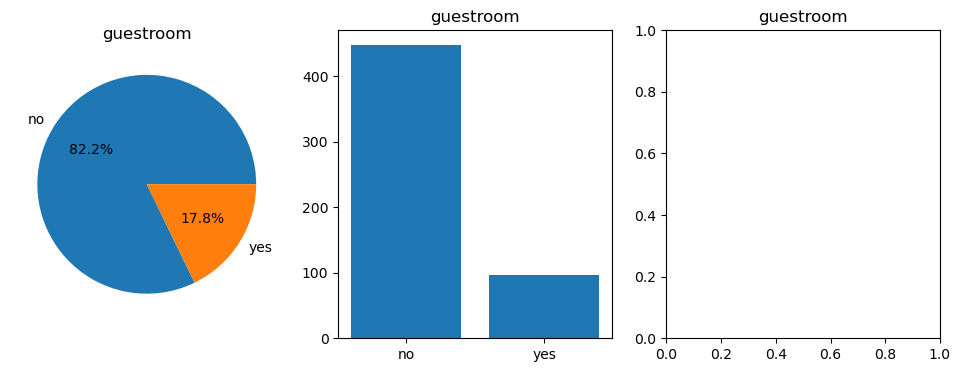

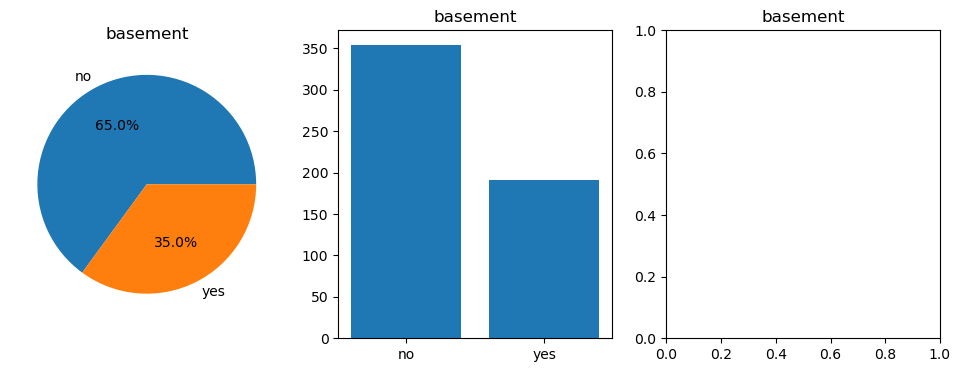

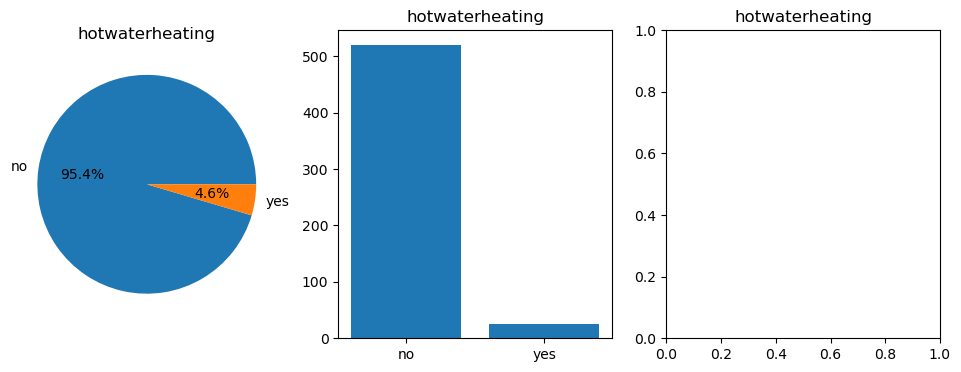

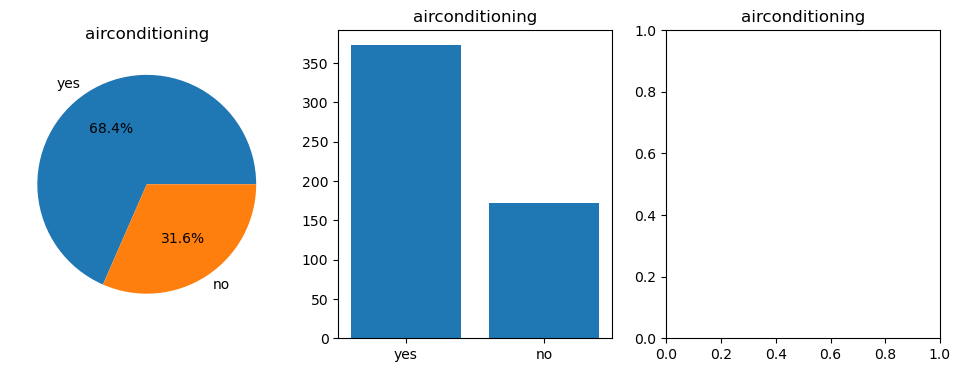

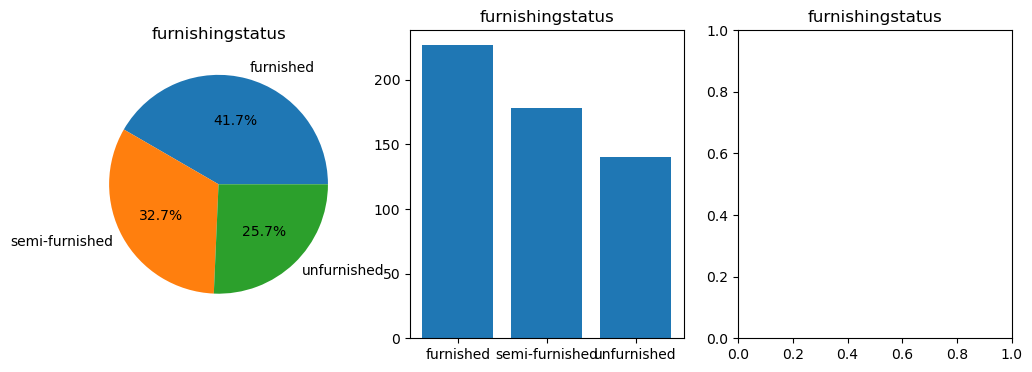

In [14]:
for col in df_cat.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 3, 1)
    plt.pie(df_cat[col].value_counts(), autopct="%1.1f%%", labels=df_cat[col].unique())
    plt.title(col)
    plt.subplot(1, 3, 2)
    plt.bar(df_cat[col].unique(), df_cat[col].value_counts())
    plt.title(col)
    plt.subplot(1, 3, 3)
    #col.plot.kde(df_cat[col].unique(), df_cat[col].value_counts())
    plt.title(col)
    plt.show()

#### Here I had applied a pie chart and countplot on the categorical data to check the values of each label in these features. I had used a for loop and applied it on dataset categorical data columns.
### Mainroad:
##### 85.9% houses are touching the mainroad and only 14.1% are not touching the mainroad. The same is shown in the pie chart. As the countplot is showing almost 470 Houses are touching mainroad and only 75 houses are not on mainroad.
### Guestroom:
##### 82.2% houses doesnt have a guestroom whereas 17.8% houses have it. The same is shown in the pie chart. As the countplot is showing almost 450 Houses doesnt have a guestroom, whereas approx 95 houses does have it.
### Basement:
##### 65% houses doesnt have a basement whereas 35% houses have it. The same is shown in the pie chart. As the countplot is also showing almost 355 Houses doesnt have a basement, whereas approx 190 houses does have it.
### HotWaterHeating:
##### 95.4% houses doesnt have HotWaterHeating facility, whereas only 4.6% houses have it. The same is shown in the pie chart. The countplot is also showing almost 520 Houses doesnt have HotWaterHeating facility, only 25 houses have it.
### Airconditioning:
##### 68.4% houses does have Air_Conditioning installed, whereas 31.6% doesn't. The same is shown in the pie chart. As the countplot is showing almost 375 Houses have Air_Conditioning installed, whereas approxx 170 houses doesnt have it.
### Furnishing_Status:
##### 41.7% houes are furnished, 32.7% are semi-furnished, whereas 25.7% are unfurnished. The same is shown in the pie chart. The countplot is approxx 230 houes are furnished, approxx 180 are semi-furnished, whereas approxx 135 houses are unfurnished.

In [11]:
df_int_1 = df_int.iloc[:, 2:]
df_int_1.head()
#Selecting the integer value columns and removing price and area from it.

,bedrooms,bathrooms,stories,parking
0,4,2,3,2
1,4,4,4,3
2,3,2,2,2
3,4,2,2,3
4,4,1,2,2


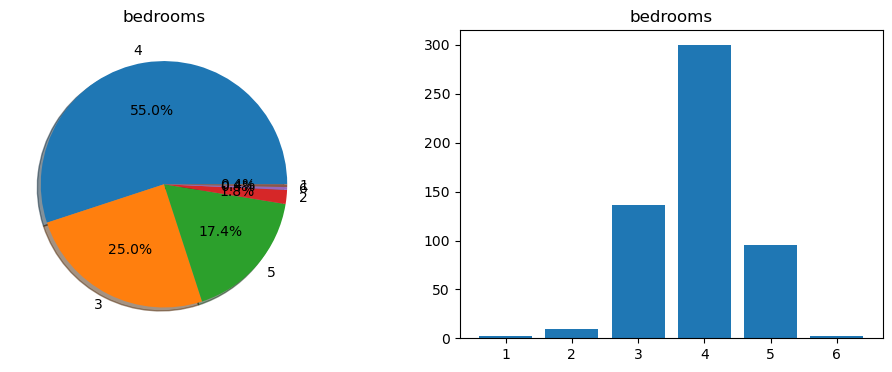

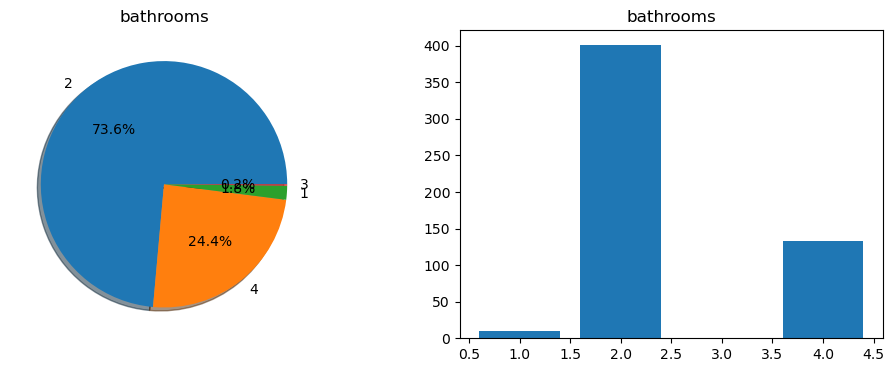

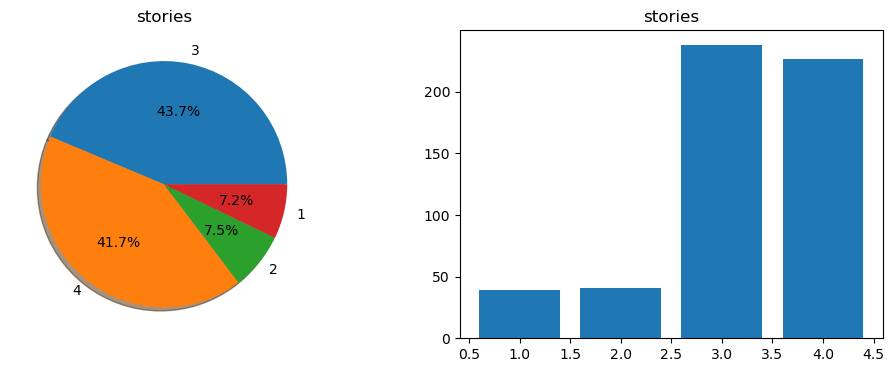

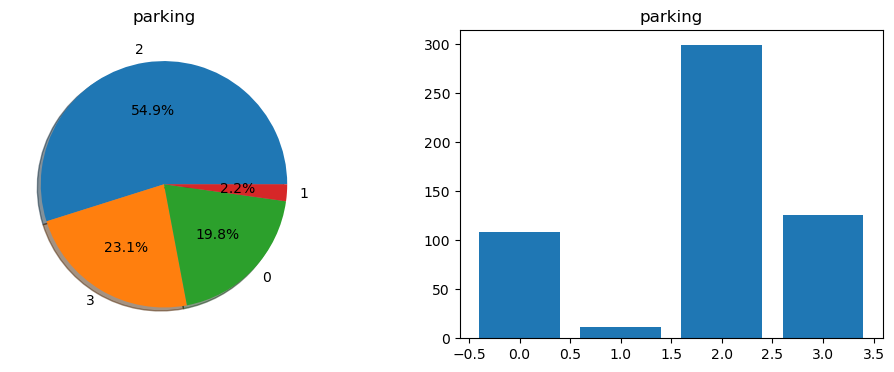

In [12]:
for col in df_int_1.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.pie(df_int_1[col].value_counts(), autopct="%1.1f%%", labels=df_int_1[col].unique(), shadow=True)
    plt.title(col)
    plt.subplot(1, 2, 2)
    plt.bar(df_int_1[col].unique(), df_int_1[col].value_counts())
    plt.title(col)
    plt.show()

### Bedroom
###### In our dataset. maximum houses have 4 bedrooms, which takes 55% of total houses. At second place we have the demand of 3 Bedroom houses and then 5 bedroom. 1, 2 and 6 bedroom demands were too low.
### Bathrooms
###### In our dataset. maximum houses have 2 bathrooms, which takes 73.6% of total houses. At second place we have the demand of 4 bathrooms houses. Demand for 1 and 3 bathroom houses were too low.
### Stories
###### Majority of the customeres have preferred 3 & 4 story houses, which conclude almost 85% people went for 3 and 4 story houses. Demand for 1 and 2 story houses were too low.
### Parking
###### Majority of the customeres have preferred at least 2 OR 3 parking spaces in their house, which include almost 78% of the people went for 2 and 3 parking spaces. There are people who went for house with 0 parking space. Whereas only 2.2% of the people selected at least 1 parking space in their house.

In [13]:
df_int_2 = df_int.iloc[:, :2]
df_int_2.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


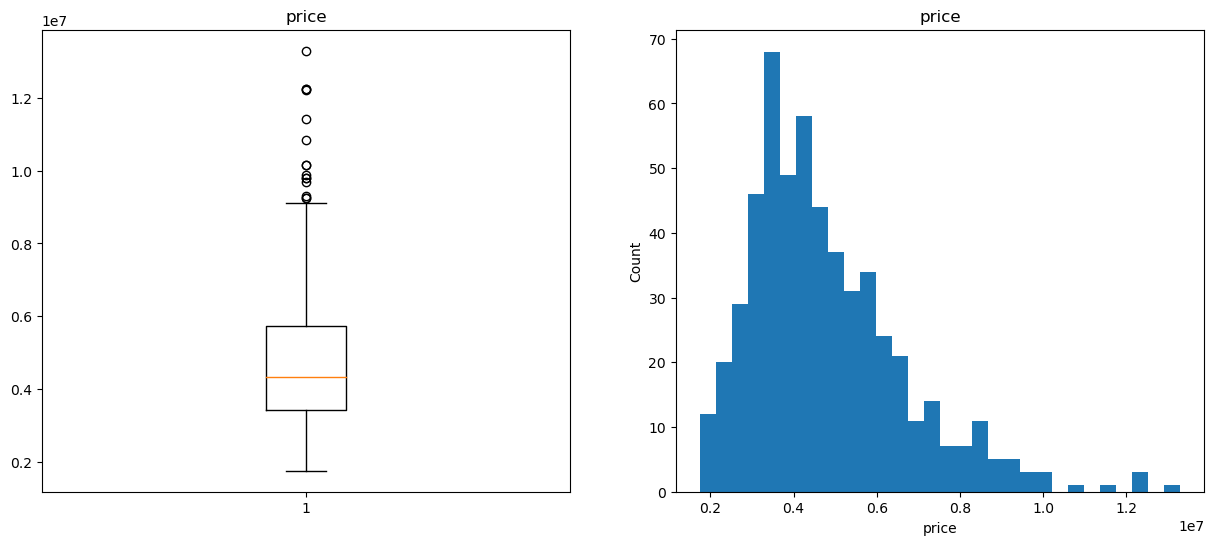

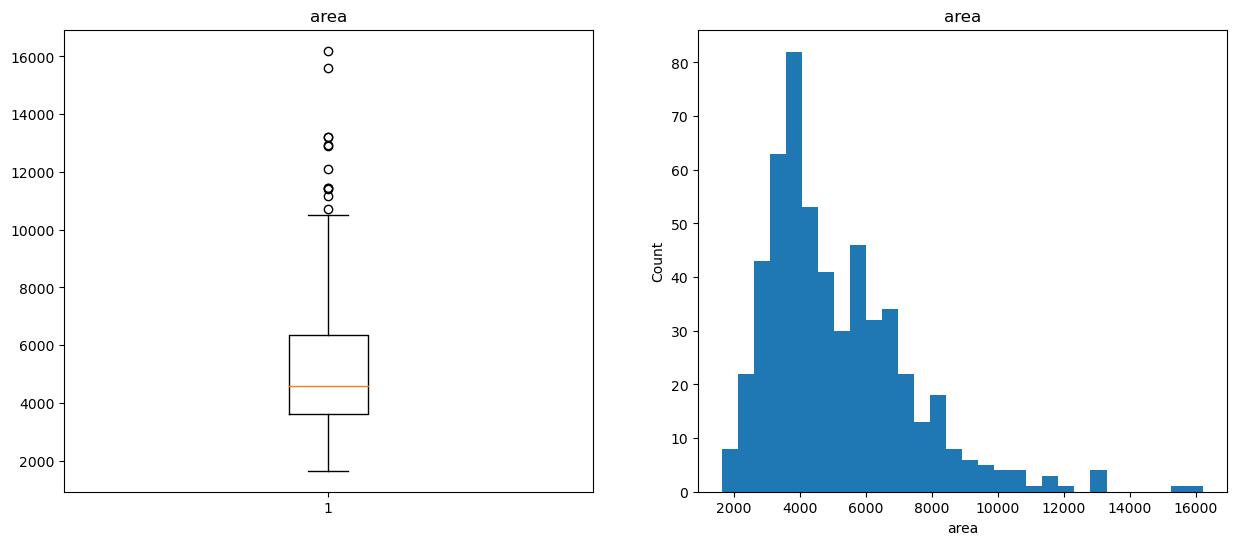

In [14]:
for col in df_int_2.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.boxplot(x=df_int_2[col])
    plt.title(col)
    plt.subplot(1, 2, 2)
    plt.hist(df_int_2[col], bins=30)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

### Price
###### Majority of the customers purchased the house between 3.5 Million to (almost) 6 Million. 
### Area
###### Majority of the customers purchased the house which has the area betwen 3500 SQFT - 7000 SQFT.

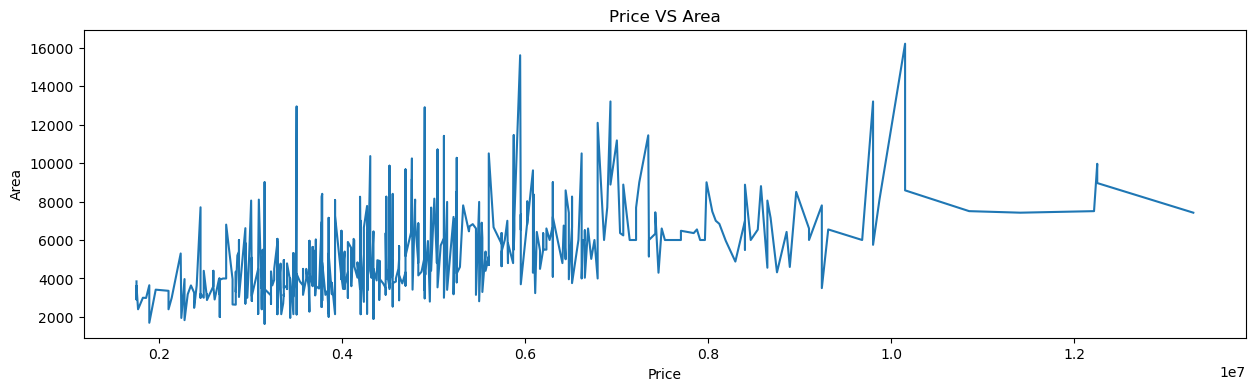

In [24]:
plt.figure(figsize=(15,4))
plt.plot(df_int_2["price"], df_int_2["area"])
plt.xlabel("Price")
plt.ylabel("Area")
plt.title("Price VS Area")
plt.show()

# Bivariate Analysis

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


<Figure size 1200x1500 with 0 Axes>

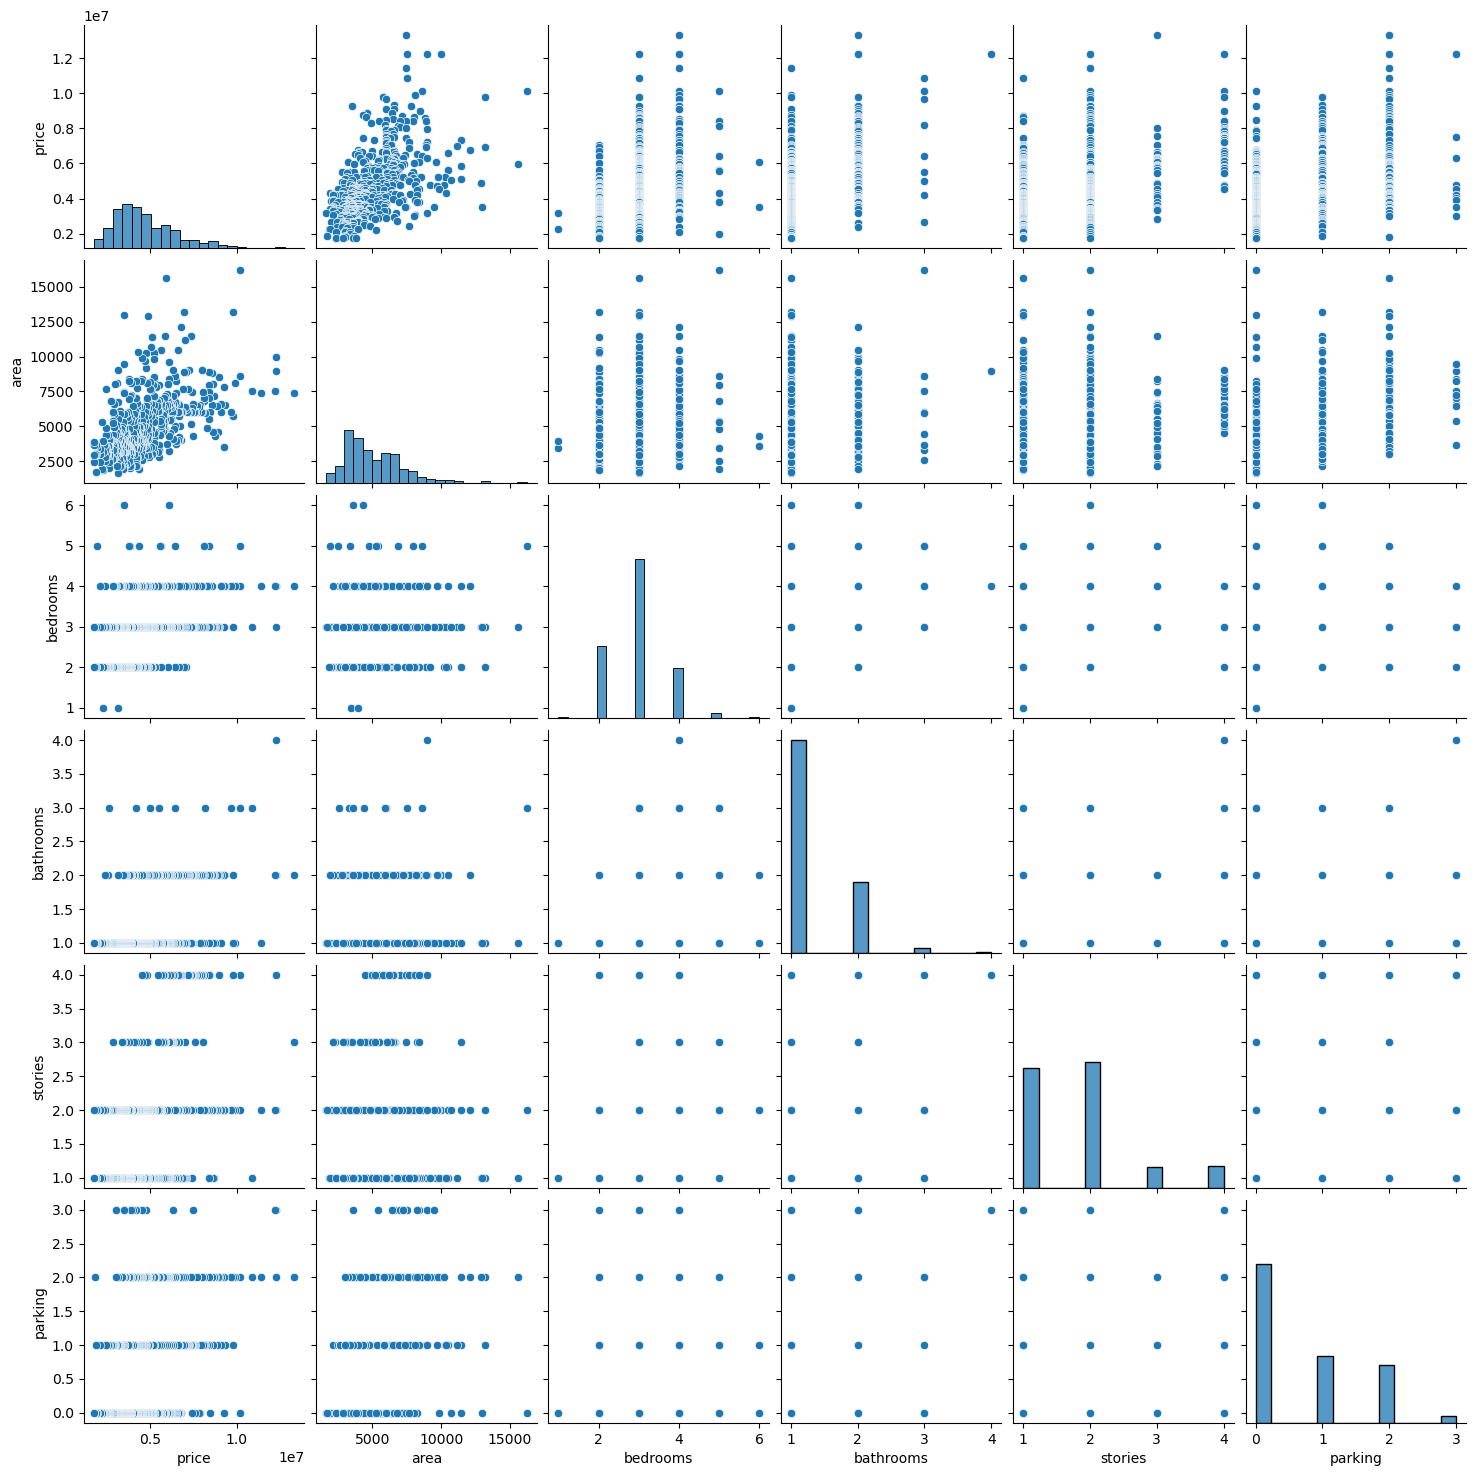

In [16]:
plt.figure(figsize=(12,15))
sns.pairplot(data=df)
plt.show()

In [17]:
df_comparison = df.drop(["area", "price"], axis=1)
df_comparison.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4,2,3,yes,no,no,no,yes,2,furnished
1,4,4,4,yes,no,no,no,yes,3,furnished
2,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,4,2,2,yes,no,yes,no,yes,3,furnished
4,4,1,2,yes,yes,yes,no,yes,2,furnished


In [18]:
for col in df_comparison.columns:
    print(col)

bedrooms
bathrooms
stories
mainroad
guestroom
basement
hotwaterheating
airconditioning
parking
furnishingstatus


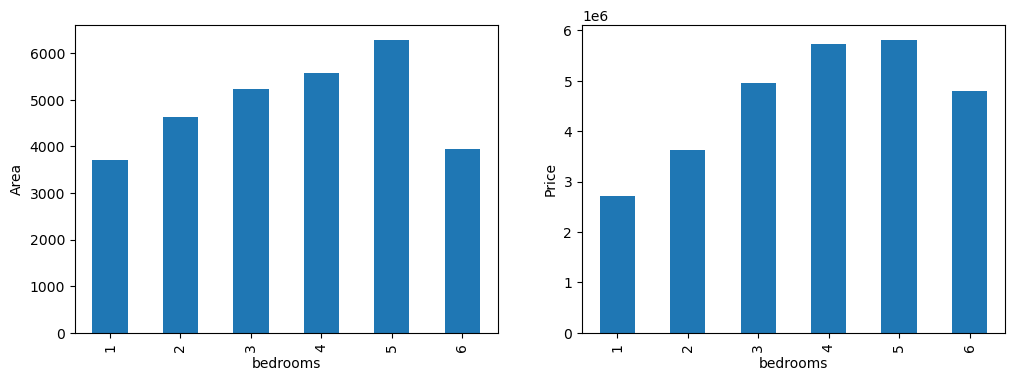

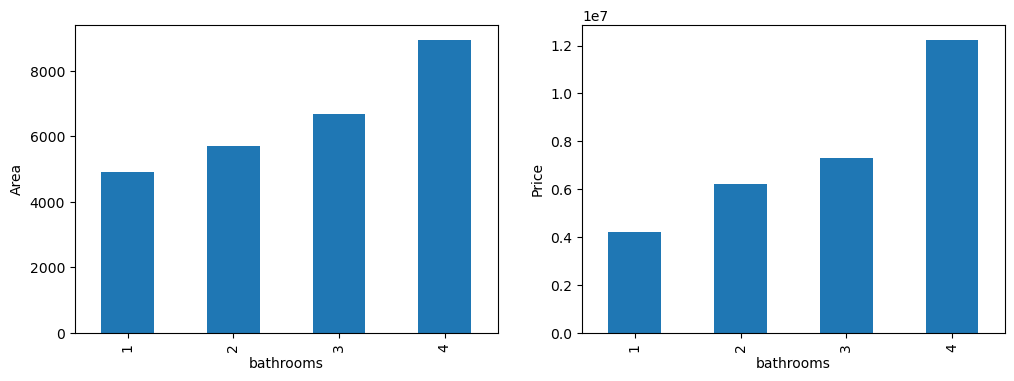

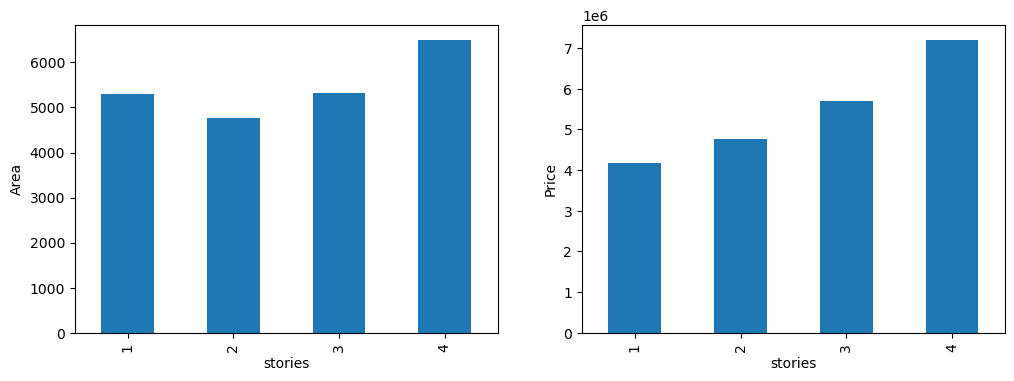

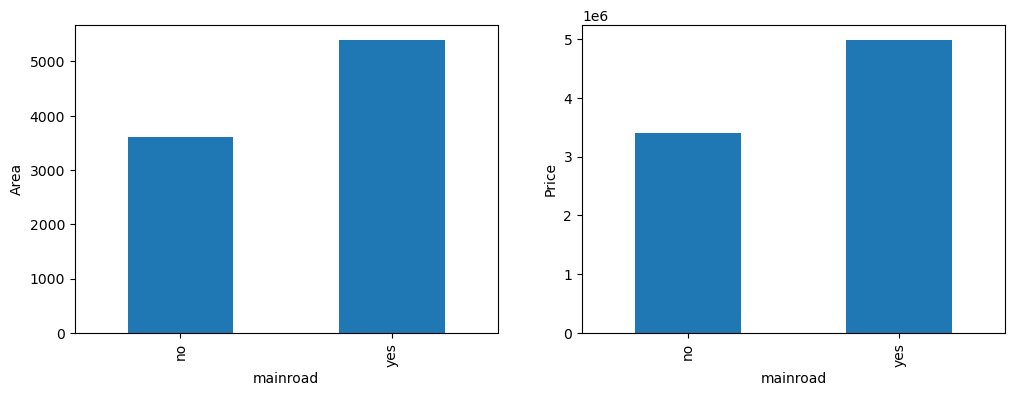

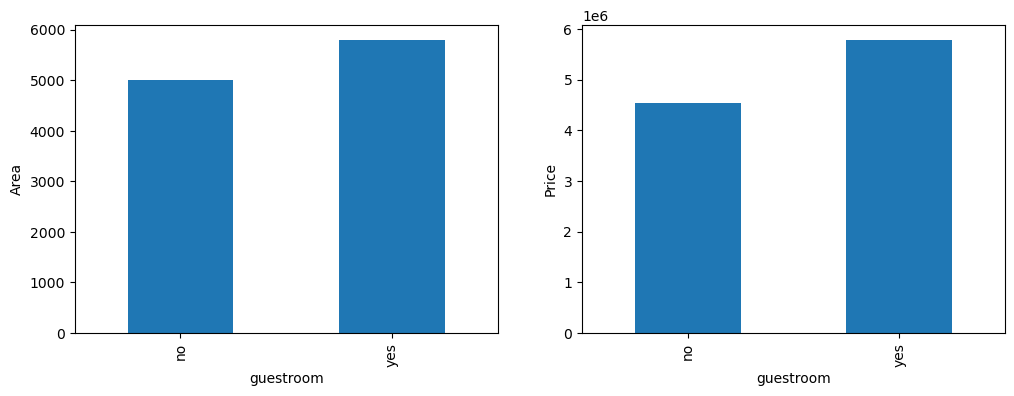

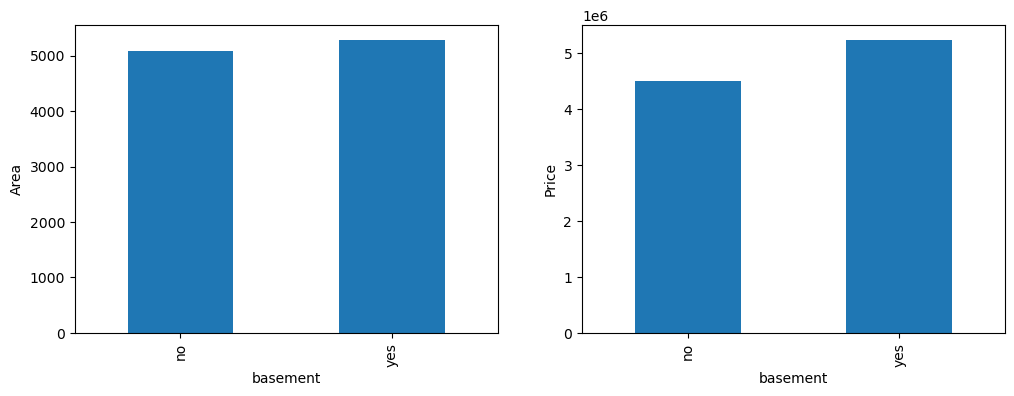

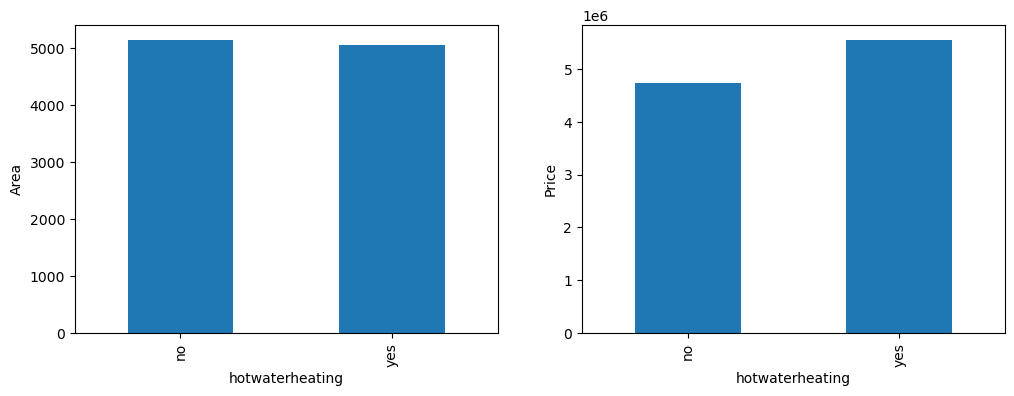

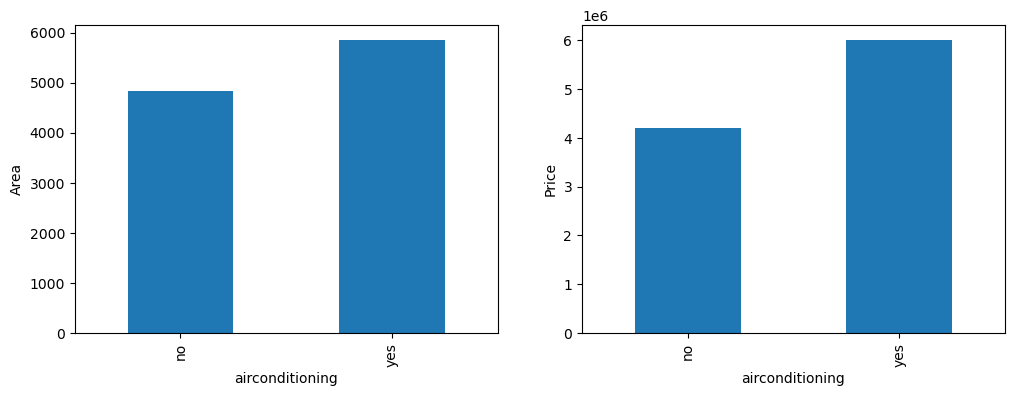

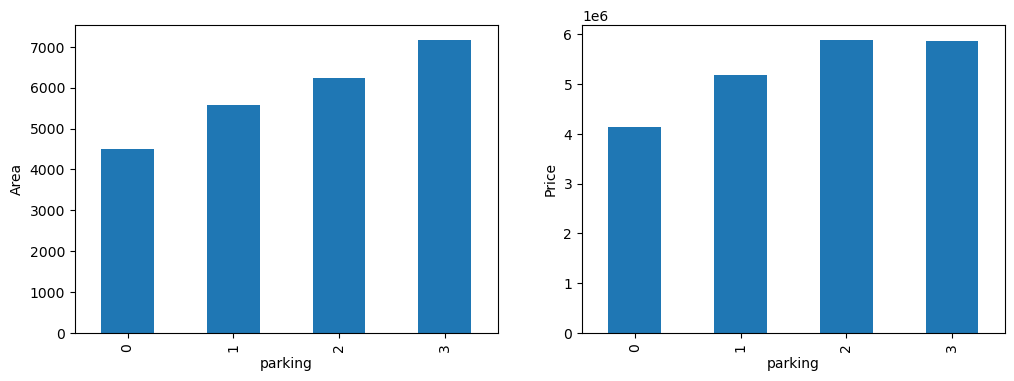

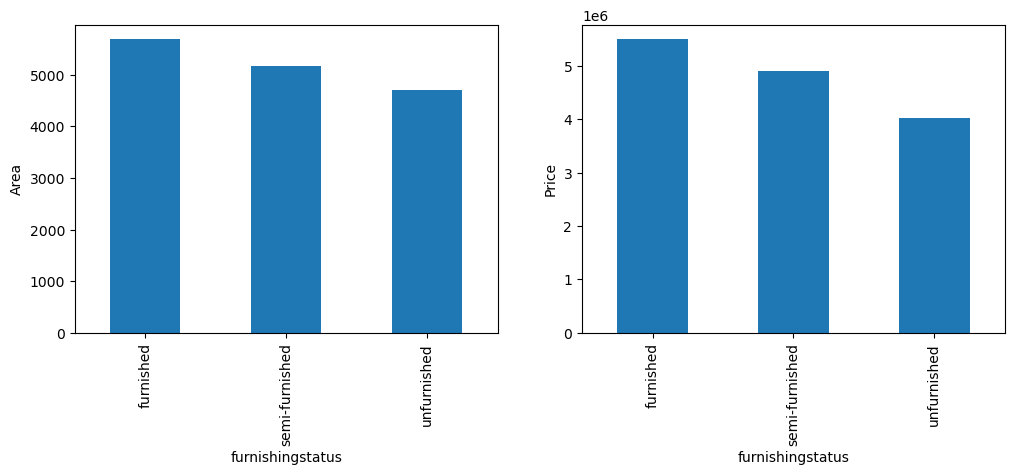

In [19]:
for col in df_comparison.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    df.groupby(col)["area"].mean().plot.bar()
    plt.ylabel("Area")
    plt.subplot(1,2,2)
    df.groupby(col)["price"].mean().plot.bar()
    plt.ylabel("Price")
    plt.show()

#### Bedroom vs area vs price:
###### By checking the bedroom with mean value of area and price, I found that 1 Bedroom housee has taken an area of approxx 3600 SQFT, whereas the prces for it is in the range of 2.7 - 2.8 M. 2 Bedroom house has the average area of 4500 SQFT annd the price range is 3.6 M. 3 Bedroom house has an average area of 5200 SQFT, whereas the price for it in the range of 5M (Approx). 4 Bedroomm house has an aread of 5500 SQFT, whereas the prices for this is 5.7 M (Approxx), 5 Bedroom house has the average area above 6K SQFT, wheras the prices for it in the range of 5.8-5.9 M, 6 Bedroom houses are built on an average area of 3800 SQFT, whereas the price for it lies around 5M.
#### Bathrooms vs area vs price:
###### The house having 1 bathroom has an average area of 4800 SQFT and the price range for this is around 4M. 2 bathroom house are having an average area of around 6K SQFT and prices in the range of 6M, 3 Bathroom house have an area of around 6700 SQFT, whereas the price is in the range of 7.5M, 4 Bathrroom house are built on around 9500 SQFT area, whereas the price is highest of around 12M.
#### Stories vs area vs price:
###### Majority of the house built with 1 story have an area around 5200 SQFT, wheereas the 2 story houses have 4800 SQFT, the price for 1 Sotry house is ranign 4M, whereas for  story it is around 4.8M. 3 Story houses are havin an area of 5300 SQFT with the pricce range of 5.8M, 4 story house are occupying the highest area with higher price, the area is 6500+ whereas the price is 7.4M+.
#### Mainroad vs area vs price:
###### Houses bulit on an average area of 3500, the mainroad connectivity is not there and price range of house with no mainroad connectivity is around 3.5M, whereas the houses having mainroad connectivity have an average area of 5300 with the price rangin 5M+.

# Multivariate

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [26]:
df["mainroad"] = df["mainroad"].map({"yes":1, "no":0}).astype(int)
df["guestroom"] = df["guestroom"].map({"yes":1, "no":0}).astype(int)
df["basement"] = df["basement"].map({"yes":1, "no":0}).astype(int)
df["hotwaterheating"] = df["hotwaterheating"].map({"yes":1, "no":0}).astype(int)
df["airconditioning"] = df["airconditioning"].map({"yes":1, "no":0}).astype(int)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,furnished


In [27]:
a = pd.get_dummies(df['furnishingstatus'])
a

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [28]:
df = pd.concat([df,a], axis=1)

In [29]:
df = df.drop(["furnishingstatus"], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,1,0,0


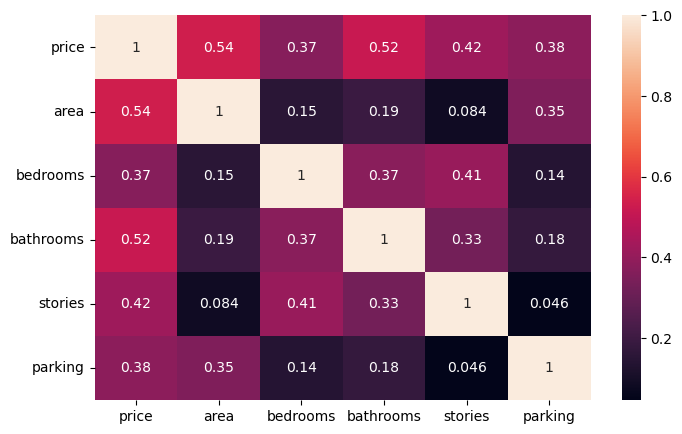

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(data=df_int.corr(method="pearson"), annot=True)
plt.show()